In [ ]:
!pip install --user anaml-client[plotting,pandas,google]==0.20.0

In [28]:
from 'anaml-client' import AnamlClient

SyntaxError: invalid syntax (1656232231.py, line 1)

In [26]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from anaml_client import Anaml

ModuleNotFoundError: No module named 'anaml_client'

In [26]:
sns.set(style = 'white')

In [41]:
import warnings
warnings.filterwarnings('ignore')

## Create Anaml client

In [7]:
client = Anaml('http://dev.anaml.app/api', 'eb958345-3257-4525-a143-7fa5ed969d36', 'UBPsDAJhw4nO7v6Cepmvcv3HQdu+O1CrAg0cPYPPmiU=')

## Load Feature Values

In [10]:
client.get_feature_store_by_name('telco_churn_demo_schedule')

FeatureStore(id=FeatureStoreId(value=11), name=FeatureStoreName(value='telco_churn_demo_schedule'), description='', labels=[], attributes=[], featureSet=FeatureSetId(value=7), enabled=True, destinations=[TableDestinationReference(destinationId=DestinationId(value=6), tableName='telco_customers'), TableDestinationReference(destinationId=DestinationId(value=2), tableName='telco_customers')], cluster=ClusterId(value=2), schedule=NeverSchedule(), startDate=None, endDate=None, versionTarget=None, version=FeatureStoreVersionId(value=UUID('12ca54bb-4307-46a0-9353-14def1f4de39')))

In [12]:
run = client.get_latest_feature_store_run_by_name('telco_churn_demo_schedule')

In [13]:
df = client.load_features_to_pandas(run)

In [14]:
df.head()

,customer_id,date,telco_customer_total_charges,telco_customer_tenure,telco_customer_has_streaming_tv,telco_customer_monthly_charges,telco_customer_payment_method,telco_customer_has_dependents,telco_customer_has_paperless_billing,telco_customer_gender,...,telco_customer_has_phone_service,telco_customer_has_online_backup,telco_customer_is_senior_citizen,telco_customer_has_multiple_lines,telco_customer_has_streaming_movies,telco_customer_did_churn,telco_customer_has_partner,telco_customer_internet_service_type,telco_customer_contract_type,telco_customer_has_device_protection
0,0661-KQHNK,2021-10-03,105.5,6,0,19,Credit card (automatic),1,0,Female,...,1,0,0,0,0,0,1,No,One year,0
1,9732-OUYRN,2021-10-03,918.7,49,0,19,Credit card (automatic),0,0,Female,...,1,0,0,0,0,0,1,No,One year,0
2,4709-LKHYG,2021-10-03,540.05,29,0,20,Electronic check,1,0,Female,...,1,0,0,0,0,0,1,No,One year,0
3,9824-QCJPK,2021-10-03,666.75,36,0,20,Mailed check,0,0,Male,...,1,0,0,0,0,0,1,No,One year,0
4,4716-MRVEN,2021-10-03,599.3,29,0,20,Mailed check,0,0,Female,...,1,0,0,0,0,0,0,No,One year,0


In [15]:
df.columns.values

array(['customer_id', 'date', 'telco_customer_total_charges',
       'telco_customer_tenure', 'telco_customer_has_streaming_tv',
       'telco_customer_monthly_charges', 'telco_customer_payment_method',
       'telco_customer_has_dependents',
       'telco_customer_has_paperless_billing', 'telco_customer_gender',
       'telco_customer_has_online_security',
       'telco_customer_has_tech_support',
       'telco_customer_has_phone_service',
       'telco_customer_has_online_backup',
       'telco_customer_is_senior_citizen',
       'telco_customer_has_multiple_lines',
       'telco_customer_has_streaming_movies', 'telco_customer_did_churn',
       'telco_customer_has_partner',
       'telco_customer_internet_service_type',
       'telco_customer_contract_type',
       'telco_customer_has_device_protection'], dtype=object)

## Prepare model inputs

In [17]:
df.dtypes

customer_id                             object
date                                    object
telco_customer_total_charges            object
telco_customer_tenure                   object
telco_customer_has_streaming_tv          int64
telco_customer_monthly_charges          object
telco_customer_payment_method           object
telco_customer_has_dependents            int64
telco_customer_has_paperless_billing     int64
telco_customer_gender                   object
telco_customer_has_online_security       int64
telco_customer_has_tech_support          int64
telco_customer_has_phone_service         int64
telco_customer_has_online_backup         int64
telco_customer_is_senior_citizen         int64
telco_customer_has_multiple_lines        int64
telco_customer_has_streaming_movies      int64
telco_customer_did_churn                 int64
telco_customer_has_partner               int64
telco_customer_internet_service_type    object
telco_customer_contract_type            object
telco_custome

In [19]:
df.telco_customer_monthly_charges = pd.to_numeric(df.telco_customer_monthly_charges, errors='coerce')
df.telco_customer_total_charges = pd.to_numeric(df.telco_customer_total_charges, errors='coerce')
df.dtypes

customer_id                              object
date                                     object
telco_customer_total_charges            float64
telco_customer_tenure                    object
telco_customer_has_streaming_tv           int64
telco_customer_monthly_charges          float64
telco_customer_payment_method            object
telco_customer_has_dependents             int64
telco_customer_has_paperless_billing      int64
telco_customer_gender                    object
telco_customer_has_online_security        int64
telco_customer_has_tech_support           int64
telco_customer_has_phone_service          int64
telco_customer_has_online_backup          int64
telco_customer_is_senior_citizen          int64
telco_customer_has_multiple_lines         int64
telco_customer_has_streaming_movies       int64
telco_customer_did_churn                  int64
telco_customer_has_partner                int64
telco_customer_internet_service_type     object
telco_customer_contract_type            

In [73]:
df.isnull().sum()

customer_id                             0
date                                    0
telco_customer_total_charges            0
telco_customer_tenure                   0
telco_customer_has_streaming_tv         0
telco_customer_monthly_charges          0
telco_customer_payment_method           0
telco_customer_has_dependents           0
telco_customer_has_paperless_billing    0
telco_customer_gender                   0
telco_customer_has_online_security      0
telco_customer_has_tech_support         0
telco_customer_has_phone_service        0
telco_customer_has_online_backup        0
telco_customer_is_senior_citizen        0
telco_customer_has_multiple_lines       0
telco_customer_has_streaming_movies     0
telco_customer_did_churn                0
telco_customer_has_partner              0
telco_customer_internet_service_type    0
telco_customer_contract_type            0
telco_customer_has_device_protection    0
dtype: int64

In [74]:
# Remove rows with null values
df.dropna(inplace=True)

In [75]:
# Drop Customer ID and Date columns
df2 = df.iloc[:,2:]

In [76]:
# Automatically transform categorical variables into numeric features
df_dummies = pd.get_dummies(df2)
df_dummies.head(20)

,telco_customer_total_charges,telco_customer_has_streaming_tv,telco_customer_monthly_charges,telco_customer_has_dependents,telco_customer_has_paperless_billing,telco_customer_has_online_security,telco_customer_has_tech_support,telco_customer_has_phone_service,telco_customer_has_online_backup,telco_customer_is_senior_citizen,...,telco_customer_payment_method_Electronic check,telco_customer_payment_method_Mailed check,telco_customer_gender_Female,telco_customer_gender_Male,telco_customer_internet_service_type_DSL,telco_customer_internet_service_type_Fiber optic,telco_customer_internet_service_type_No,telco_customer_contract_type_Month-to-month,telco_customer_contract_type_One year,telco_customer_contract_type_Two year
0,105.50,0,19.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1,918.70,0,19.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,540.05,0,20.0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3,666.75,0,20.0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4,599.30,0,20.0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
5,196.35,0,20.0,1,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
6,445.30,0,20.0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7,817.95,0,20.0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
8,211.95,0,20.0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
9,860.85,0,20.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


## Feature Exploration

<AxesSubplot:>

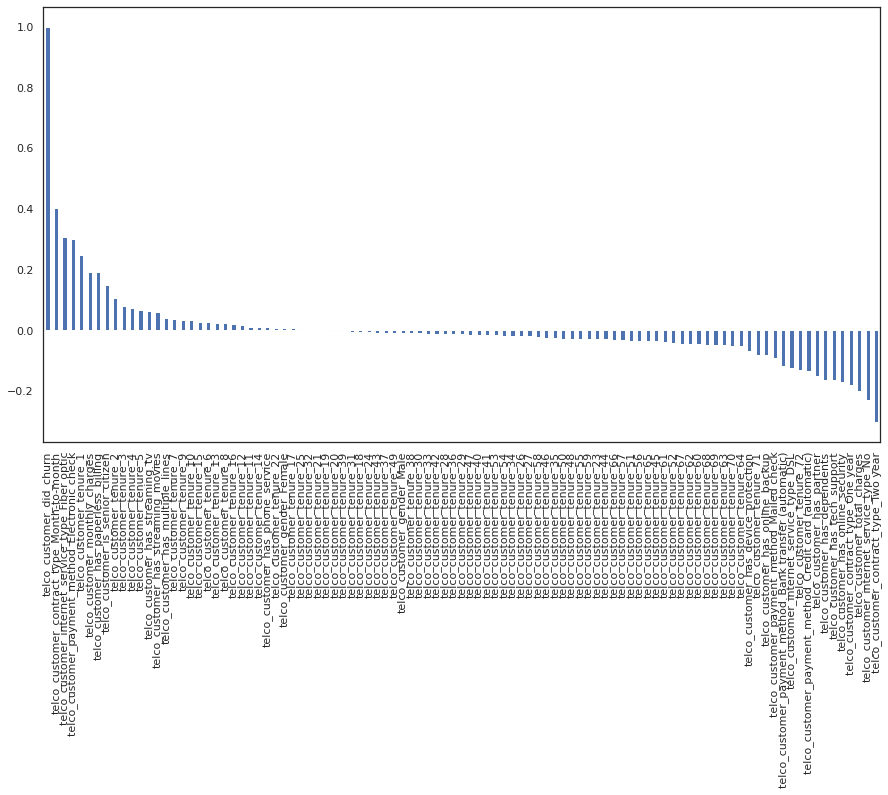

In [77]:
# Plot features by correlation to Churn
plt.figure(figsize=(15,8))
df_dummies.corr()['telco_customer_did_churn'].sort_values(ascending=False).plot(kind='bar')

In [33]:
gender = client.get_feature_by_name('telco_customer_gender')
client.preview_feature(gender)

[CategoricalSummaryStatistics(countNulls=0, dataType='string', featureName='telco_customer_gender', count=7043, categoryFrequencies=[CategoryFrequency(category='Female', frequency=3488), CategoryFrequency(category='Male', frequency=3555)])]

In [37]:
telco_customer_contract_type = client.get_feature_by_name('telco_customer_contract_type')
client.plot_feature_preview(telco_customer_contract_type)

AttributeError: 'CategoricalSummaryStatistics' object has no attribute 'get'

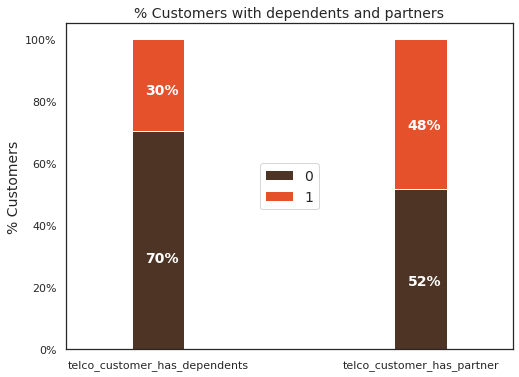

In [38]:
df2 = pd.melt(df, id_vars=['customer_id'], value_vars=['telco_customer_has_dependents', 'telco_customer_has_partner'])
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(df)
colors = ['#4D3425', '#E4512B']
ax = df3.loc[:,'customer_id'].plot.bar(stacked=True, color=colors,
                                       figsize=(8,6),rot=0,
                                       width=0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size=14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners', size=14)
ax.legend(loc='center', prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight= 'bold',
                size  = 14)

Text(0.5, 1.0, '# of Customers by their tenure')

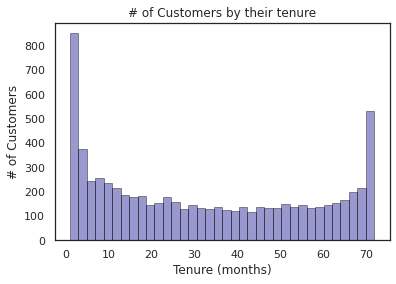

In [42]:
ax = sns.distplot(df['telco_customer_tenure'], hist=True, kde=False, 
                  bins=int(180/5), color='darkblue', 
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4})

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

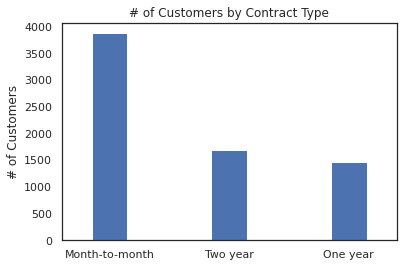

In [44]:
ax = df['telco_customer_contract_type'].value_counts().plot(kind='bar', rot=0, width=0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

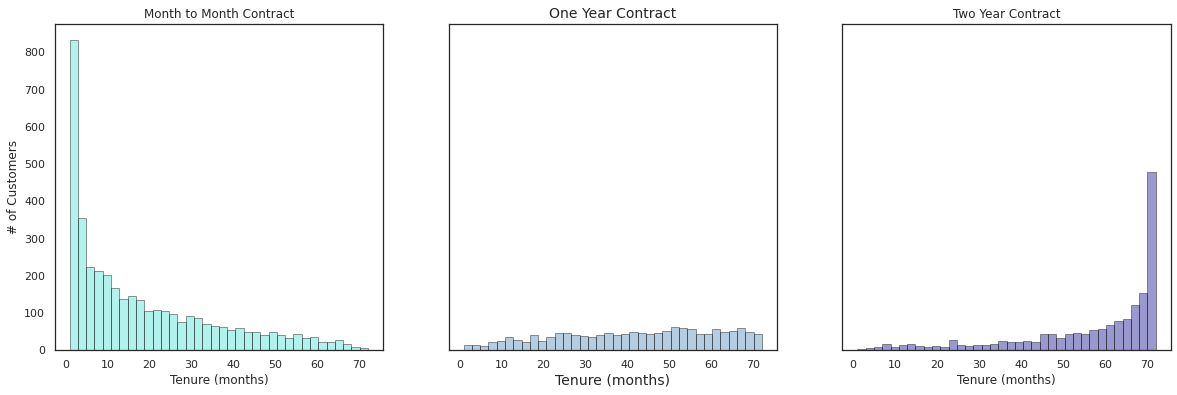

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,6))

ax = sns.distplot(df[df['telco_customer_contract_type'] == 'Month-to-month']['telco_customer_tenure'],
                  hist=True, kde=False,
                  bins=int(180 / 5), color='turquoise',
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax1)

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['telco_customer_contract_type'] == 'One year']['telco_customer_tenure'],
                  hist=True, kde=False,
                  bins=int(180 / 5), color='steelblue',
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax2)

ax.set_xlabel('Tenure (months)', size=14)
ax.set_title('One Year Contract', size=14)

ax = sns.distplot(df[df['telco_customer_contract_type']=='Two year']['telco_customer_tenure'],
                  hist=True, kde=False,
                  bins=int(180 / 5), color='darkblue',
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

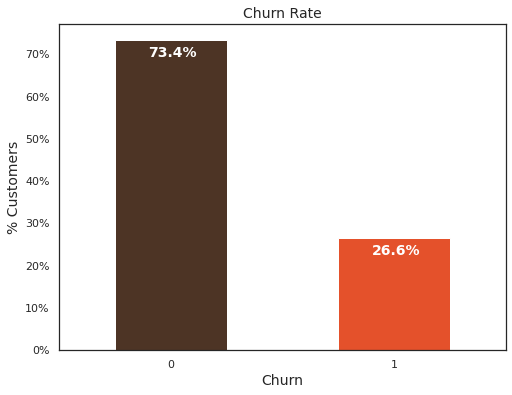

In [47]:
colors = ['#4D3425', '#E4512B']
ax = (df['telco_customer_did_churn'].value_counts() * 100.0 / len(df))\
    .plot(kind='bar', stacked=True, rot=0, color=colors, figsize=(8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + .15, i.get_height() - 4.0, \
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold',
            size=14)

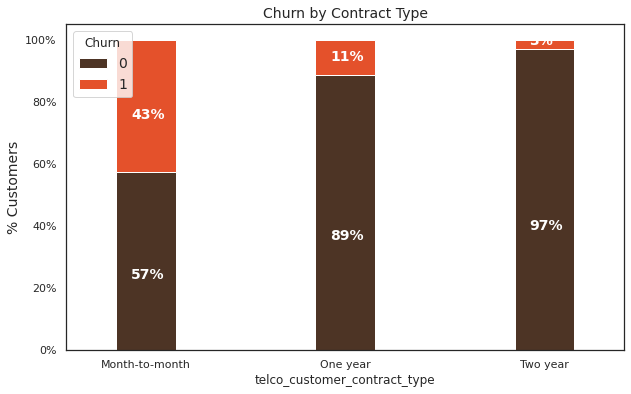

In [54]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['telco_customer_contract_type', 'telco_customer_did_churn']).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width=0.3,
                                                                stacked=True,
                                                                rot=0, 
                                                                figsize=(10,6),
                                                                color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size':14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color = 'white',
                weight= 'bold',
                size  = 14)

## Build Model

In [55]:
X = df_dummies.drop(columns=['telco_customer_did_churn'])
y = df_dummies['telco_customer_did_churn']

In [62]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [57]:
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [64]:
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8085308056872038


AxesSubplot(0.125,0.125;0.775x0.755)


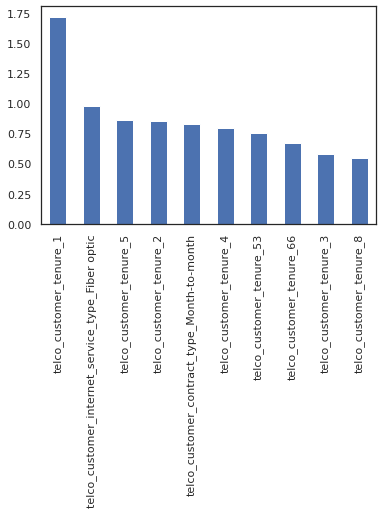

In [65]:
# Get the weights of the Top 10 variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


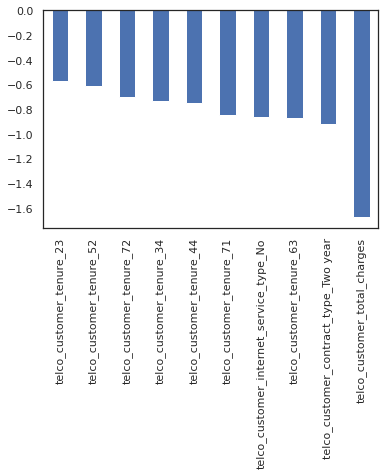

In [66]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))